# Question 1

In [137]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt



In [138]:
eta = 0.1    # damping coefficient
k =  0.1    # spring constant
m = 1.0     # mass
param = (eta/m)**2 - 4*k/m
print(param)

-0.39


In [139]:
p0 = 2.
v0 = 0.01
t = np.linspace(0, 20, 100)
if param > 0:
    a = 0.5 * (-eta/m + math.sqrt(eta**2/m**2 - 4*k/m))
    b = 0.5 * (-eta/m - math.sqrt(eta**2/m**2 - 4*k/m))
    A = (p0*b - v0) / (b-a)
    B = (v0 - p0*a) / (b-a)
    p = A * np.exp(a * t) + B * np.exp(b * t)
elif param < 0:
    a = -0.5 * eta/m
    b = 0.5 * math.sqrt(4*k/m - eta**2/m**2)
    A = p0
    B = (v0 - p0*a) / b
    p = A * np.exp(a * t) * np.cos(b * t) + B * np.exp(a * t) * np.sin(b * t)
else:
    assert(False)

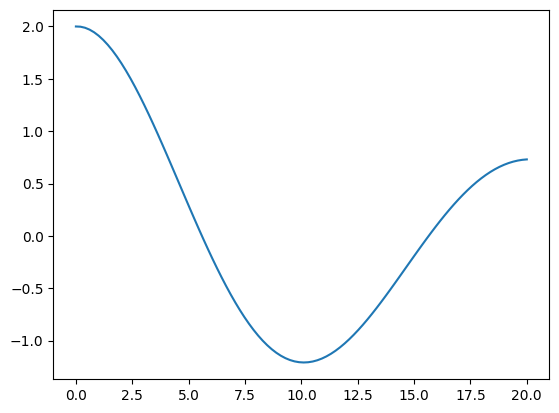

In [140]:
plt.plot(t, p);

# Question 2

In [141]:
MA = np.array([[0,1], [-k/m,-eta/m]])
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    x[i,:] = linalg.expm(MA*t[i])@x0  

In [142]:
linalg.expm(MA)

array([[ 0.9520249 ,  0.93584713],
       [-0.09358471,  0.85844019]])

In [143]:
MA

array([[ 0. ,  1. ],
       [-0.1, -0.1]])

In [144]:
np.exp(MA)

array([[1.        , 2.71828183],
       [0.90483742, 0.90483742]])

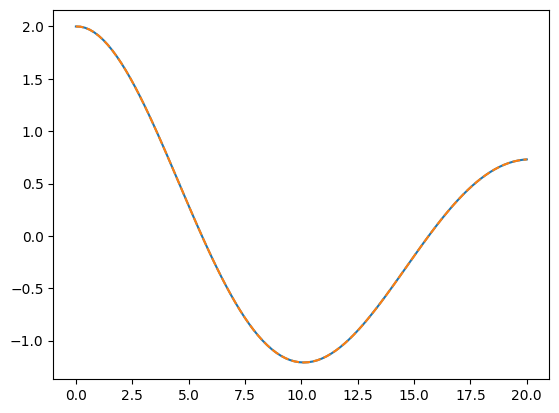

In [145]:
plt.plot(t, x[:,0], t, p, '--');

# Question 3

## a) solve the ODE with Euler's method

Euler method for ODE
\begin{equation}
    \frac{dx}{dt} = f(x,t) + u(t)
\end{equation}
is given by
\begin{equation}
    x(t + \Delta t) = x(t) + [f(x,t) + u(t)] \Delta t
\end{equation}


We have : $\dot{x}(t) = A x(t) + B u(t)$

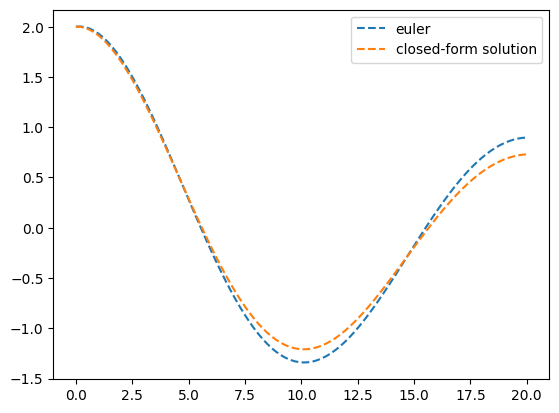

In [146]:
dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1, t.shape[0]):
    cx = cx + (MA @ cx) * dt
    x_euler[i, :] = cx

plt.plot(t, x_euler[:,0], '--', label = "euler")
plt.plot(t, p, '--', label = "closed-form solution")
plt.legend();

In [147]:
print(dt)

0.20202020202020202


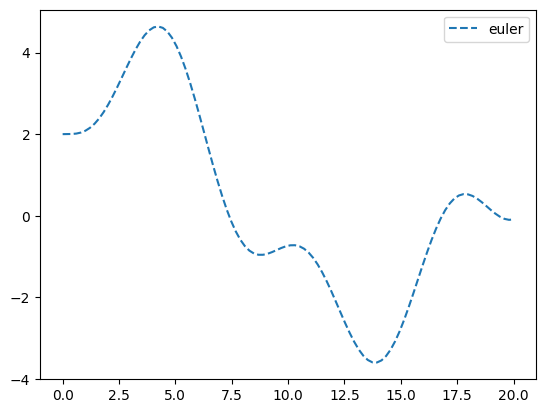

In [148]:
# u = lambda t: 1.
# u = lambda t: t
u = lambda t: math.sin(t)
Bu = np.array([0,1])

dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1,t.shape[0]):
    cx = cx + (MA @ cx + Bu * u(t[i])) * dt
    x_euler[i,:] = cx

plt.plot(t, x_euler[:,0], '--', label = "euler");
plt.legend();

## b) Compare the solution to the solution obtained in Exercise 2d.
Closed-form solution for $\dot{x} = A x(t) + B u(t)$ is :
\begin{equation}
    x(t) = exp(A t)x(0) + \int_{0}^t exp((t - s) A) B u(s) ds.
\end{equation}

In [149]:
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0], 2))
for i in range(t.shape[0]):
    disc_u = np.zeros(x.shape[1])
    for j in range(x.shape[1]):
        val, err = integrate.quad(lambda s: (linalg.expm(MA * (t[i]-s))@ Bu * u(s))[j], 0, t[i])
        disc_u[j] = val
    x[i,:] = linalg.expm(MA*t[i]) @ x0 + disc_u

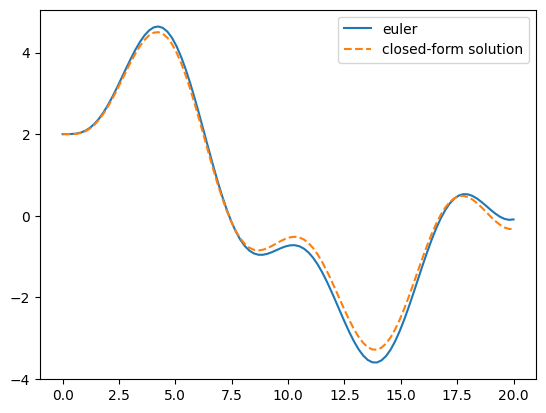

In [150]:
plt.plot(t, x_euler[:,0], label = "euler")
plt.plot(t, x[:,0], '--', label = "closed-form solution")
plt.legend();

## c) Use a builtin ODE solver to obtain numerical solution to the ODE.

In [151]:
def f(x, t):
    return MA@x + Bu*u(t)

In [152]:
x_odeint = integrate.odeint(f, x0, t)

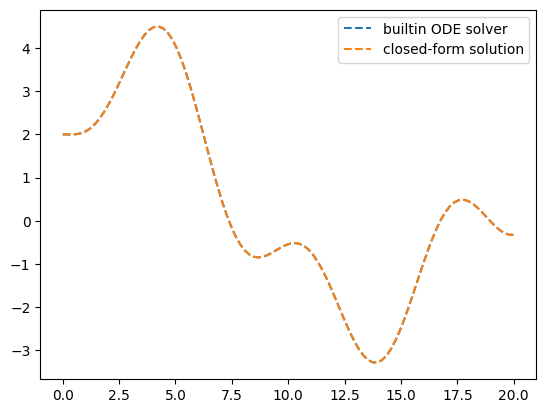

In [153]:
plt.plot(t,x_odeint[:,0],'--', label = "builtin ODE solver")
plt.plot(t, x[:,0], '--', label = "closed-form solution")
plt.legend();